In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import pickle as pck
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [16]:
train = pd.read_csv('./data/dataset_malwares.csv', sep=',')
test = pd.read_csv('./data/dataset_test.csv', sep=',')

In [19]:
X = train.drop(['Name', 'Malware', 'TimeDateStamp'], axis = 1)
y = train['Malware']

In [20]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=101)
X_train.head()

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
11441,23117,144,3,0,4,0,65535,0,184,0,...,3791650912,0,17,22,0,409626,422944,81920,77824,0
2624,23117,144,3,0,4,0,65535,0,184,0,...,3221225536,0,1,135,0,0,113332,131072,0,0
18874,23117,144,3,0,4,0,65535,0,184,0,...,3221225536,0,15,347,4,111632,132520,139264,0,0
16415,23117,144,3,0,4,0,65535,0,184,0,...,3221225600,0,7,159,0,0,29736,241664,0,117181216
11179,23117,144,3,0,4,0,65535,0,184,0,...,3221225536,0,4,88,0,0,222988,241664,0,719360


In [21]:
rfc = RandomForestClassifier(n_estimators=100, random_state=0, 
                          oob_score = True,
                          max_depth = 16)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=16, oob_score=True, random_state=0)

In [22]:
y_pred = rfc.predict(X_test)

In [23]:
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malware']))


              precision    recall  f1-score   support

      Benign       0.99      0.97      0.98       974
     Malware       0.99      1.00      0.99      2949

    accuracy                           0.99      3923
   macro avg       0.99      0.98      0.99      3923
weighted avg       0.99      0.99      0.99      3923



Text(33.0, 0.5, 'True labels')

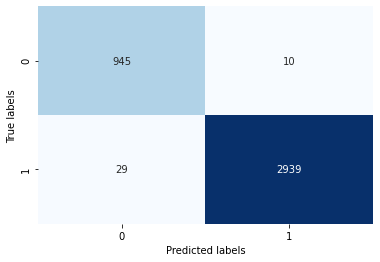

In [24]:
ax=sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

Text(0.5, 1.0, 'Features importance')

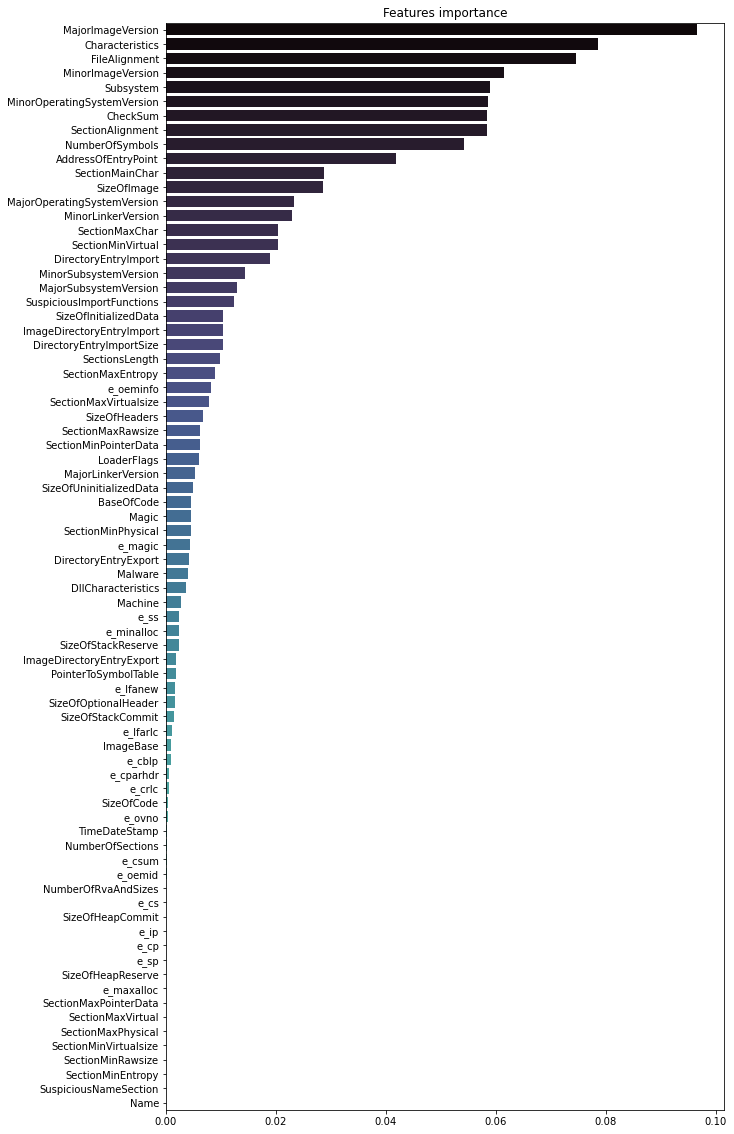

In [25]:
importance = rfc.feature_importances_
importance_dict = {train.columns.values[i]: importance[i] for i in range (len(importance))}
sorted_dict = {k: v for k, v in sorted(importance_dict.items(), key=lambda item: item[1])}
plt.figure(figsize=(10, 20))
sns.barplot(y=list(sorted_dict.keys())[::-1], x=list(sorted_dict.values())[::-1], palette='mako')
plt.title('Features importance')

In [26]:
import eli5 
from eli5.sklearn import PermutationImportance 

In [27]:
perm = PermutationImportance(rfc, scoring = "accuracy", random_state = 22).fit(X_train, y_train) 
eli5.show_weights(perm, top = 20, feature_names = X_train.columns.tolist())

Weight,Feature
0.0047 ± 0.0007,MajorLinkerVersion
0.0029 ± 0.0002,ImageBase
0.0028 ± 0.0002,ImageDirectoryEntrySecurity
0.0025 ± 0.0006,Characteristics
0.0023 ± 0.0003,DirectoryEntryExport
0.0022 ± 0.0006,Subsystem
0.0020 ± 0.0004,CheckSum
0.0017 ± 0.0006,DllCharacteristics
0.0013 ± 0.0003,ImageDirectoryEntryExport
0.0010 ± 0.0001,SectionMinVirtualsize
